# Data Visualization
### Activity 2 -Exploratory Data Analysis I
24th November 2023 <br> Fall 2023

---
### **Group 36:**
Tomás Bensimon - 43022 <br>
Cristina Tiago - 58636 <br>
Martim Esteves - 46953 <br>

---

### Imports & Setup

In [1]:
import os
path = os.path.join(os.getcwd(), 'Dataset')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

# Color Setup

color_pallete2 = ["#edf8fb", "#b3cde3", "#8c96c6", "#8856a7",
                 "#810f7c"]
color_pallete = ["#15291C", "#5E5361", "#A697B0", "#EBE9EC",
                 "#97B9C0"]
sns.set_style("dark")
display(sns.color_palette(color_pallete))
sns.set_palette(sns.color_palette(color_pallete))

[(0.08235294117647059, 0.1607843137254902, 0.10980392156862745),
 (0.3686274509803922, 0.3254901960784314, 0.3803921568627451),
 (0.6509803921568628, 0.592156862745098, 0.6901960784313725),
 (0.9215686274509803, 0.9137254901960784, 0.9254901960784314),
 (0.592156862745098, 0.7254901960784313, 0.7529411764705882)]

In [2]:
gdp = pd.read_csv ('gdp_csv.csv')
display(gdp.head(5))

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,25760683041.09
1,Arab World,ARB,1969,28434203615.48
2,Arab World,ARB,1970,31385499664.07
3,Arab World,ARB,1971,36426909888.39
4,Arab World,ARB,1972,43316056615.46


### General Data Exploration

In [3]:
print('GDP - ', gdp.shape[0], 'rows and', gdp.shape[1], 'columns')

GDP -  11507 rows and 4 columns


In [4]:
for column in gdp.columns:
    print(column, '-', gdp[column].dtype)

Country Name - object
Country Code - object
Year - int64
Value - float64


### Missing Values

In [5]:
for column in gdp.columns:
    print(column, '-', gdp[column].isna().sum())

Country Name - 0
Country Code - 0
Year - 0
Value - 0


### Intermediary Calculations
- Value GDP - Frequency Distribution

In [6]:
gdp_freq = gdp['Value'].value_counts().sort_index()
display(gdp_freq)

8824447.74           1
9122751.45           1
9365165.91           1
9630762.95           1
9742949.47           1
                    ..
74757745150689.09    1
74889946508917.80    1
75845109381590.50    1
76990857251851.00    1
79049230590610.91    1
Name: Value, Length: 11398, dtype: int64

- Age - Range, Outliers, nulls or invalids

In [7]:
gdp_max = gdp['Value'].max()
gdp_min = gdp['Value'].min()
gdp_q1 = gdp['Value'].quantile(0.25)
gdp_q2 = gdp['Value'].quantile(0.5)
gdp_q3 = gdp['Value'].quantile(0.75)
gdp_iqr = gdp_q3 - gdp_q1
gdp_outliers = gdp['Value'][(gdp['Value']<gdp_q1-1.5*gdp_iqr)|(gdp['Value']>gdp_q3+1.5*gdp_iqr)].count()
gdp_values_count = (gdp['Value'].isnull()).sum()
print('Max GDP:', gdp_max, '\nMin GDP:', gdp_min, '\nGDP Range:', gdp_max - gdp_min)
print('Q1:', gdp_q1, '\nQ2:', gdp_q2, '\nQ3:', gdp_q3, '\nIQR:', gdp_iqr, '\nNumber of Outliers:', gdp_outliers,
       '({}%)'.format(round((gdp_outliers/(gdp['Value'].notna()).sum())*100,2)))

Max GDP: 79049230590610.9 
Min GDP: 8824447.74022325 
GDP Range: 79049221766163.17
Q1: 2056874252.8008351 
Q2: 14368795335.6958 
Q3: 179639353502.511 
IQR: 177582479249.71014 
Number of Outliers: 1920 (16.69%)


In [8]:
average_gdp_by_country = gdp.groupby('Country Name')['Value'].mean().reset_index()

average_gdp_sorted = average_gdp_by_country.sort_values(by='Value', ascending=False)

print(average_gdp_sorted)

                  Country Name             Value
252                      World 26095941840318.75
95                 High income 19507049981856.05
176               OECD members 19269556794047.59
189  Post-demographic dividend 18524425148264.72
70       Europe & Central Asia  8631478475004.30
..                         ...               ...
181                      Palau      162690781.48
148           Marshall Islands      113651397.22
118                   Kiribati       76238475.43
165                      Nauru       75801166.93
238                     Tuvalu       21324494.47

[256 rows x 2 columns]


In [19]:
individual_countries = gdp[gdp['Country Name'].isin(exclude_list)]

average_gdp_by_country = individual_countries.groupby('Country Name')['Value'].mean().reset_index()
average_gdp_sorted = average_gdp_by_country.sort_values(by='Value', ascending=True)

print(average_gdp_sorted)

                                         Country Name             Value
35                        Pacific island small states     3917888096.79
1                              Caribbean small states    24825180392.88
34                                 Other small states   121531963417.37
38                                       Small states   154694832345.99
26                                         Low income   162747928189.23
13             Heavily indebted poor countries (HIPC)   174337143902.93
17                                          IDA blend   223080621132.72
37                           Pre-demographic dividend   287569619906.06
24       Least developed countries: UN classification   362848057706.39
18                                           IDA only   382055245369.30
43         Sub-Saharan Africa (excluding high income)   444159353418.41
42          Sub-Saharan Africa (IDA & IBRD countries)   444592689232.31
41                                 Sub-Saharan Africa   44459268

In [9]:
num_countries = gdp['Country Name'].nunique()

print(f'Total number of unique countries: {num_countries}')

unique_countries = gdp['Country Name'].unique()
print('\nList of unique countries:')
for country in unique_countries:
    print(country)

Total number of unique countries: 256

List of unique countries:
Arab World
Caribbean small states
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (excluding high income)
East Asia & Pacific (IDA & IBRD countries)
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
Europe & Central Asia (IDA & IBRD countries)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Latin America & the Caribbean (IDA & IBRD countries)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (excluding high income)
Middle East & North Africa (IDA & IBRD countries)
Middle income
North America
OECD members
Other small states
Pacific isl

In [14]:
exclude_list = [
    'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
    'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
    'East Asia & Pacific (IDA & IBRD countries)', 'Euro area', 'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)', 'Europe & Central Asia (IDA & IBRD countries)',
    'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)',
    'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
    'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification',
    'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)', 'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states',
    'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World']


individual_countries = gdp[~gdp['Country Name'].isin(exclude_list)]

num_individual_countries = individual_countries['Country Name'].nunique()
print(f'Total number of unique individual countries: {num_individual_countries}')

unique_individual_countries = individual_countries['Country Name'].unique()
print('\nList of unique individual countries:')
for country in unique_individual_countries:
    print(country)

Total number of unique individual countries: 210

List of unique individual countries:
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isl

In [10]:
highest_year = gdp['Year'].max()
lowest_year = gdp['Year'].min()

print(f"Highest Year: {highest_year}")
print(f"Lowest Year: {lowest_year}")

Highest Year: 2016
Lowest Year: 1960


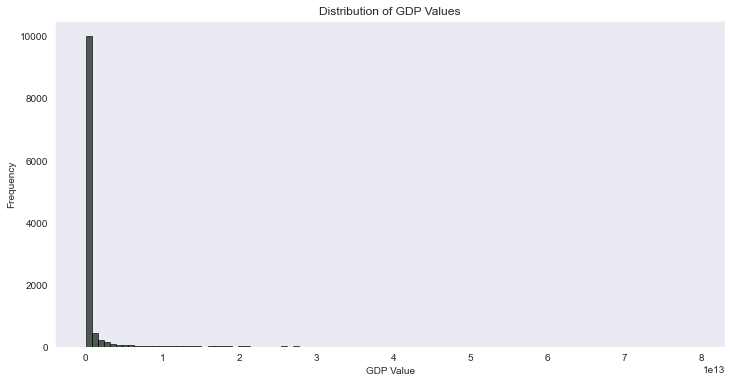

In [11]:
plt.figure(figsize=(12, 6))

sns.histplot(data=gdp, x='Value', bins=100, kde=False, edgecolor='black')

plt.title('Distribution of GDP Values')
plt.xlabel('GDP Value')
plt.ylabel('Frequency')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

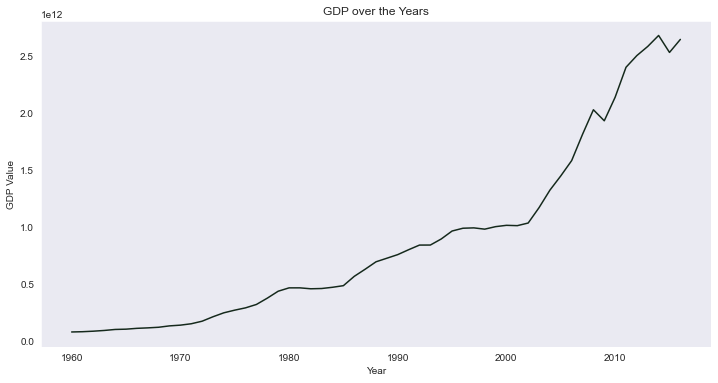

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp, x='Year', y='Value', ci = None)
plt.title('GDP over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.show

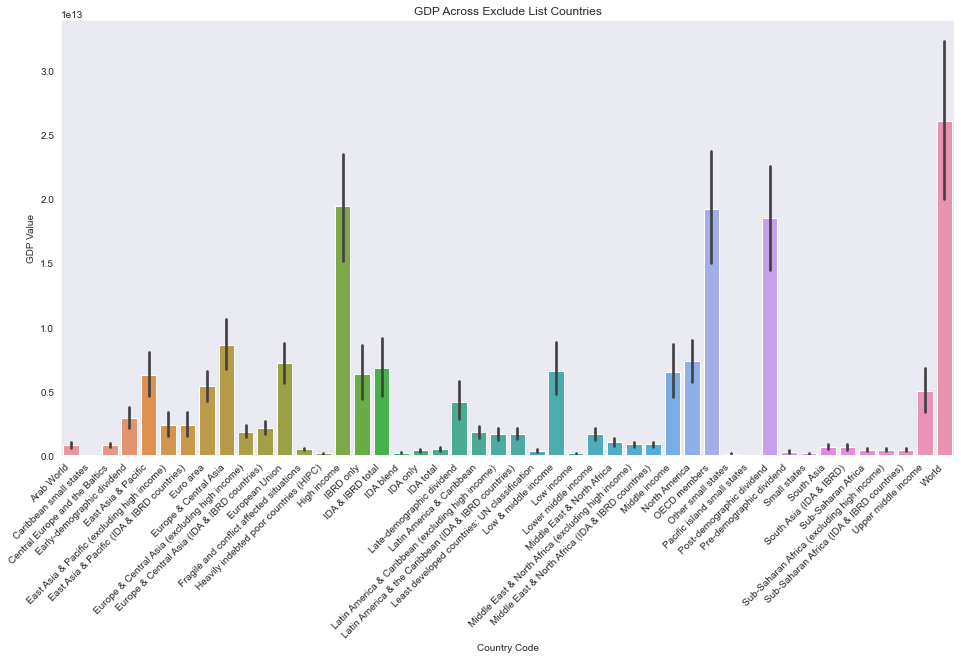

In [15]:
exclude_list_countries = gdp[gdp['Country Name'].isin(exclude_list)]

plt.figure(figsize=(16, 8))
sns.barplot(data=exclude_list_countries, x='Country Name', y='Value')
plt.title('GDP Across Exclude List Countries')
plt.xlabel('Country Code')
plt.ylabel('GDP Value')
plt.xticks(rotation=45, ha='right')
plt.show()

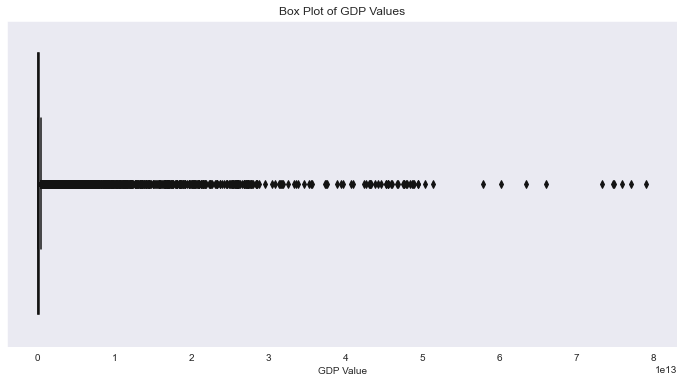

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdp, x = 'Value')
plt.title('Box Plot of GDP Values')
plt.xlabel('GDP Value')
plt.show()

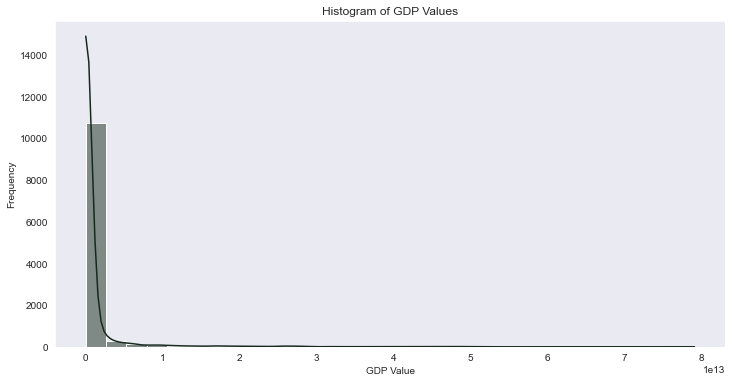

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data=gdp, x='Value', bins=30, kde=True)
plt.title('Histogram of GDP Values')
plt.xlabel('GDP Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
gdp['Value'] = gdp.groupby('Country Code')['Value'].transform(lambda x: x.fillna(x.mean()))

gdp['Value'] = gdp['Value'].fillna(gdp['Value'].mean())

print(gdp.isnull().sum())

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64


In [20]:
gdp['Year'] = gdp['Year'].astype(int)

In [21]:
print(gdp['Country Name'].unique())

['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle income'
 'North America' 'OECD members' 'Other sma

In [22]:
gdp.to_csv('gdp_data.csv', index=False)